In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import glob
import os

%matplotlib inline

In [8]:
results_dir='/home/samuel/data/drift_tool_test/salish_test_201704121/output/'
# Use glob to find all netcdf files in results_dir
files = glob.glob(os.path.join(results_dir, '*.nc'))

In [12]:
results_dir='/home/samuel/'
# Use glob to find all netcdf files in results_dir
files = glob.glob(os.path.join(results_dir, '*.csv'))

In [13]:
files

['/home/samuel/2018040306_000.csv']

In [26]:
v4 = []
v5 = []
f = open('/home/samuel/2018040306_000.csv', 'r').readlines()
for line in f[1:]:
    fields = line.split(',')
    v4.append(float(fields[2]))#lat
    v5.append(float(fields[3]))#lon

v4.sort()
v5.sort()

print(v4)
print(v5)

[45.7175178528, 45.7175178528, 45.7175178528, 45.7175178528, 45.7299118042, 45.7799415588, 45.827167511, 45.87159729, 45.9149665833, 45.9577255249]
[-52.907409668, -52.8132629395, -52.7166748047, -52.6163330078, -52.5102539062, -52.3974609375, -52.3693695068, -52.3693695068, -52.3693695068, -52.3693695068]


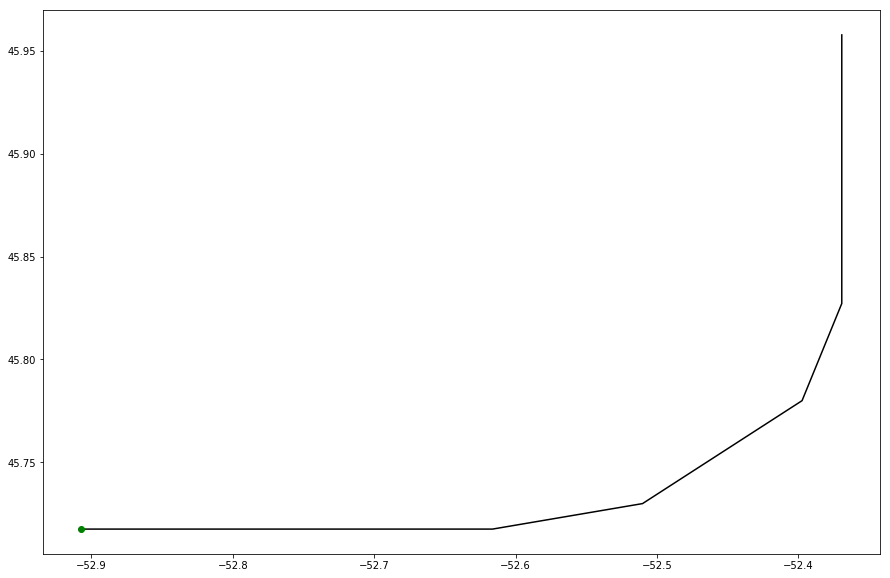

In [36]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.plot(v5, v4, c='k', label='observations')
ax.plot(v5[0], v4[0], 'go')

In [9]:
files

['/home/samuel/data/drift_tool_test/salish_test_201704121/output/salishseacast_ar_2017041200_P1D.nc',
 '/home/samuel/data/drift_tool_test/salish_test_201704121/output/salishseacast_ar_2017041100_P1D.nc']

In [10]:
file = files[0]
# Open dataset
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:       (nb_output: 25, ntraj: 31)
Coordinates:
  * nb_output     (nb_output) datetime64[ns] 2017-04-12 2017-04-12T01:00:00 ...
Dimensions without coordinates: ntraj
Data variables:
    init_x        (ntraj) float64 152.1 185.6 219.0 64.22 97.5 131.6 165.0 ...
    init_y        (ntraj) float64 255.1 238.7 222.7 324.9 308.5 292.0 275.8 ...
    init_z        (ntraj) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    init_t        (ntraj) float64 24.5 24.5 24.5 24.5 24.5 24.5 24.5 24.5 ...
    init_age      (ntraj) timedelta64[ns] 00:00:00 00:00:00 00:00:00 ...
    init_transp   (ntraj) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    final_x       (ntraj) float64 155.1 205.9 223.7 107.6 79.34 158.0 141.4 ...
    final_y       (ntraj) float64 259.9 233.1 207.8 284.0 350.1 283.1 297.2 ...
    final_z       (ntraj) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    final_t       (ntraj) float64 48.5 48.5 48.5 48.5 48.5 48.5 48.5 48.5 ...
    final

In [34]:
print(ds.traj_lon.values)

[[-123.45872442 -123.22936082 -123.00218928 -124.14680277 -123.9197464
  -123.68768762 -123.46031507 -123.23150635 -122.99999869 -124.37616509
  -124.14902005 -123.9174464  -123.45871883 -123.23031998 -123.00248208
  -124.60840225 -124.37615763 -123.22935823 -122.99999996 -124.83747101
  -123.23165131 -123.00289868 -122.99999996 -123.2315972  -123.00281143
  -123.46130753 -123.2288852  -122.99999268 -123.4587039  -123.23208662
  -123.00275115]
 [-123.45803285 -123.21854659 -122.99186914 -124.08342414 -123.87930046
  -123.64876576 -123.41976757 -123.21848491 -122.97848945 -124.33325808
  -124.12733756 -123.90880075 -123.45725754 -123.19480987 -122.99862384
  -124.57668887 -124.35244298 -123.23558755 -122.99901497 -124.82534311
  -123.23544274 -122.99723749 -122.98531432 -123.22543973 -122.98283695
  -123.464926   -123.25167149 -123.02131133 -123.46352371 -123.24371346
  -123.00651637]
 [-123.46177689 -123.21721672 -122.98906675 -124.0376422  -123.854779
  -123.6191884  -123.39459239 -12

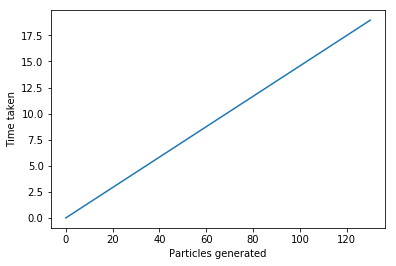

In [19]:
a = float(ds.total_time_taken)
b = a/2
plt.plot([0,65,130], [0,b,a])
plt.ylabel('Time taken')
plt.xlabel('Particles generated')
plt.show()

In [39]:
minval = np.max(ds['nav_lon'].values[np.nonzero(ds['nav_lon'].values)])
print(minval)

-122.053


In [38]:
ds['nav_lon'].values.max()

0.0

In [87]:
def my_changes(axi):
    axi.plot(figsize=(20,10))
    axi.set_title('{} {}'.format(ds.ocean_model, ds.obs_buoyid), fontname='DejaVu Sans', fontsize=18)
    #title color
    axi.title.set_color('red')
    axi.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, fontsize=15 )
    #size of scales
    axi.tick_params(axis='x', labelsize=13)
    axi.tick_params(axis='y', labelsize=13)
    #axis label with size
    axi.set_xlabel('Longitude', fontsize=20)
    axi.set_ylabel('Latitude', fontsize=20)
    #border colors
    axi.spines['bottom'].set_color('blue')
    axi.spines['top'].set_color('blue')

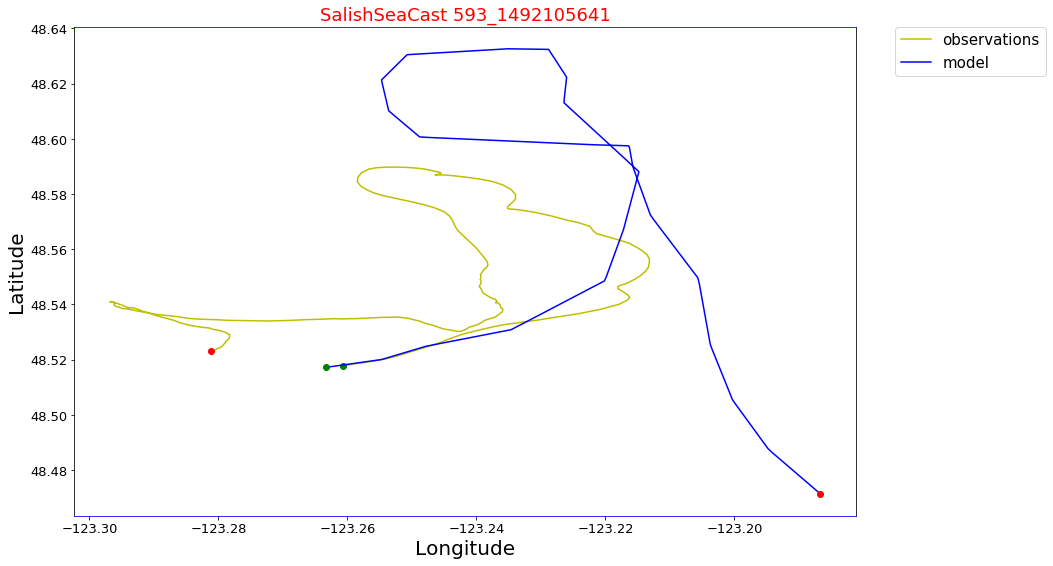

In [88]:
fig, ax = plt.subplots(1,1)
ax.plot(ds.obs_lon.values, ds.obs_lat.values, c='y', label='observations')
ax.plot(ds.obs_lon.values[0], ds.obs_lat.values[0], 'go')
ax.plot(ds.obs_lon.values[-1], ds.obs_lat.values[-1], 'ro')
ax.plot(ds.mod_lon.values, ds.mod_lat.values, c='b', label='model')
ax.plot(ds.mod_lon.values[0], ds.mod_lat.values[0], 'go')
ax.plot(ds.mod_lon.values[-1], ds.mod_lat.values[-1], 'ro')
my_changes(ax)

In [89]:
 def plot_file(fname):
    """Plot the modelled and observed trajector in a file fname"""
    ds = xr.open_dataset(fname)
    fig, ax = plt.subplots(1,1)
    ax.plot(ds.obs_lon.values, ds.obs_lat.values, c='y', label='observations')
    ax.plot(ds.obs_lon.values[0], ds.obs_lat.values[0], 'go')
    ax.plot(ds.obs_lon.values[-1], ds.obs_lat.values[-1], 'ro')
    ax.plot(ds.mod_lon.values, ds.mod_lat.values, c='k', label='model')
    ax.plot(ds.mod_lon.values[0], ds.mod_lat.values[0], 'go')
    ax.plot(ds.mod_lon.values[-1], ds.mod_lat.values[-1], 'ro')
    my_changes(ax)

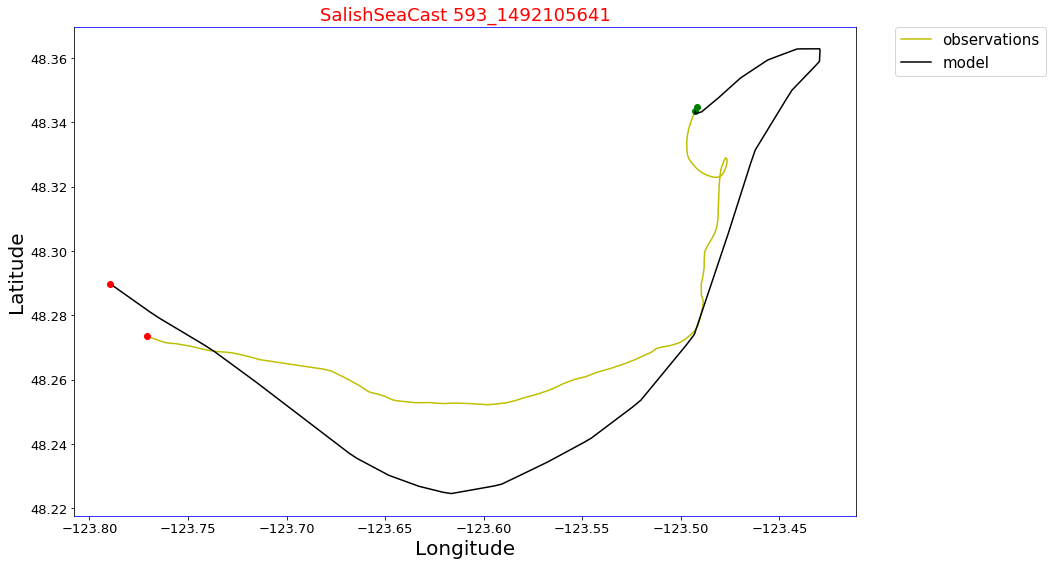

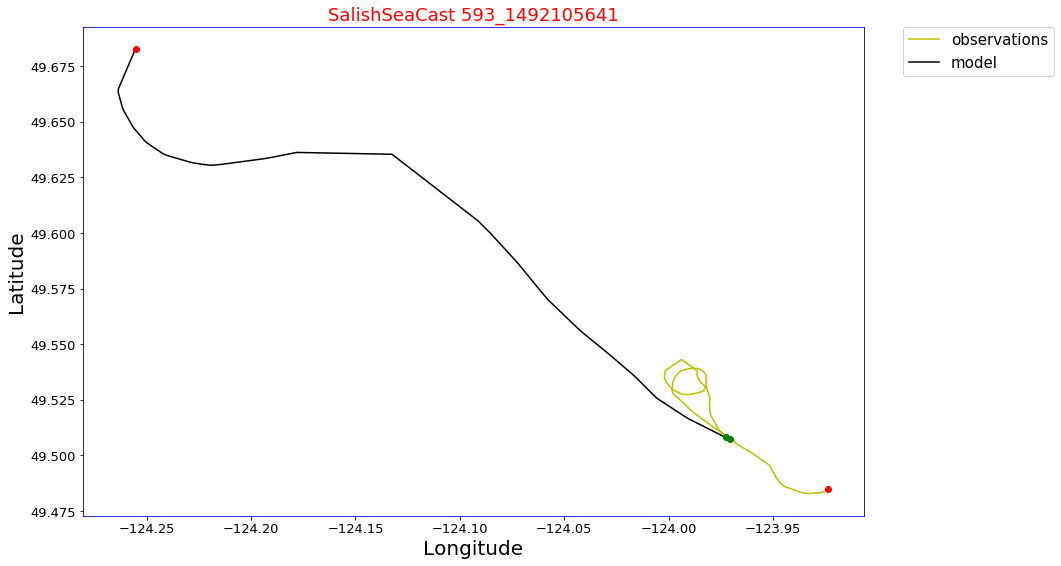

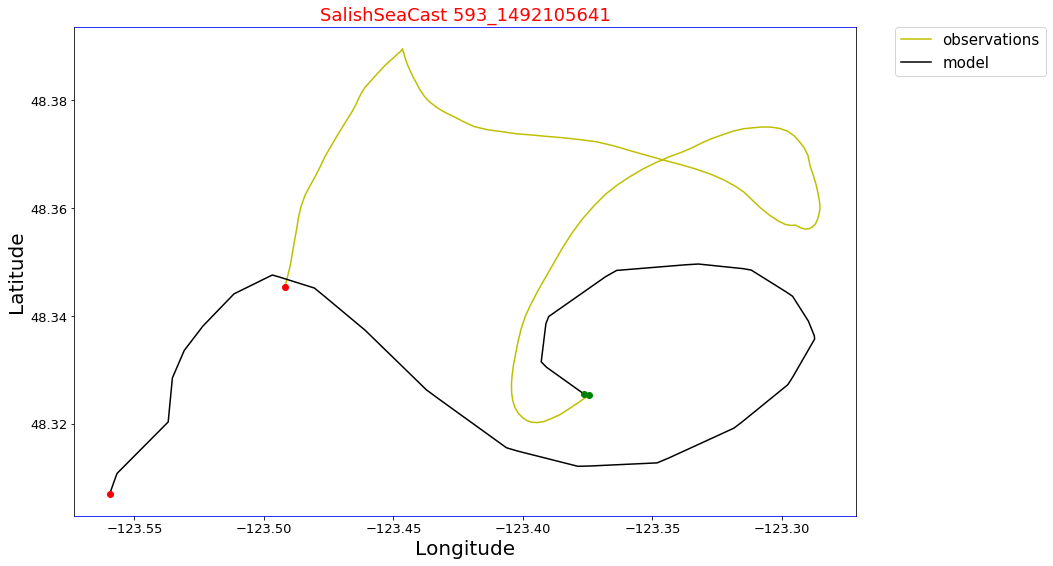

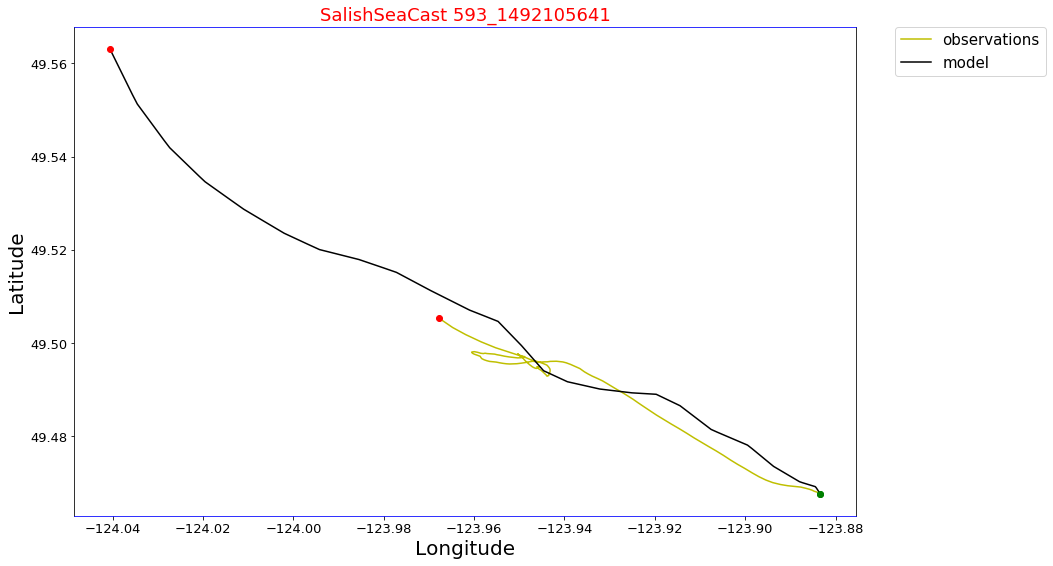

In [90]:
for file in glob.glob(os.path.join(results_dir, '*5.nc')):
    plot_file(file)